## Bir Teslimat Şirketi için Tahmini Bakım Modeli - Classification

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import warnings 
warnings.simplefilter("ignore")

In [3]:
df=pd.read_csv("failure.csv")

In [6]:
df.head(33)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
5,2015-01-01,S1F01TD5,0,68837488,0,0,41,6,413535,0,0,1
6,2015-01-01,S1F01XDJ,0,227721632,0,0,0,8,402525,0,0,0
7,2015-01-01,S1F023H2,0,141503600,0,0,1,19,494462,16,16,3
8,2015-01-01,S1F02A0J,0,8217840,0,1,0,14,311869,0,0,0
9,2015-01-01,S1F02DZ2,0,116440096,0,323,9,9,407905,0,0,164


In [8]:
df.tail(33)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
124461,2015-10-31,Z1F0QL3N,0,62018104,0,0,0,12,356937,0,0,0
124462,2015-10-31,Z1F0QLC1,0,32117368,0,0,0,10,350840,0,0,0
124463,2015-11-02,S1F0E9EP,0,205465736,0,0,12,11,353337,0,0,0
124464,2015-11-02,S1F0EGMT,0,159867281,0,0,13,11,347165,32,32,0
124465,2015-11-02,S1F0FGBQ,0,198816136,0,0,0,12,309988,0,0,0
124466,2015-11-02,S1F0FP0C,0,179176160,0,0,0,12,356892,0,0,0
124467,2015-11-02,S1F0GCED,0,94904784,64792,0,7,11,341541,0,0,0
124468,2015-11-02,S1F0GGPP,0,183027976,0,2112,0,12,362350,0,0,0
124469,2015-11-02,S1F0GPXY,0,100353624,0,0,0,11,352831,0,0,10
124470,2015-11-02,S1F0H6JG,0,159855344,0,0,0,10,345928,0,0,0


In [9]:
df.info() #iki objemiz var

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [10]:
df.isnull().sum() #boşverimiz yok

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [11]:
df.corr() #attribute7 ve attribute8 aynı korelasyona sahipler

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
failure,1.000000,0.001984,0.052902,-0.000948,0.067398,0.002270,-0.000550,0.119055,0.119055,0.001622
attribute1,0.001984,1.000000,-0.004248,0.003702,0.001837,-0.003370,-0.001516,0.000151,0.000151,0.001122
attribute2,0.052902,-0.004248,1.000000,-0.002617,0.146593,-0.013999,-0.026350,0.141367,0.141367,-0.002736
attribute3,-0.000948,0.003702,-0.002617,1.000000,0.097452,-0.006696,0.009027,-0.001884,-0.001884,0.532366
attribute4,0.067398,0.001837,0.146593,0.097452,1.000000,-0.009773,0.024870,0.045631,0.045631,0.036069
attribute5,0.002270,-0.003370,-0.013999,-0.006696,-0.009773,1.000000,-0.017051,-0.009384,-0.009384,0.005949
attribute6,-0.000550,-0.001516,-0.026350,0.009027,0.024870,-0.017051,1.000000,-0.012207,-0.012207,0.021152
attribute7,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute8,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute9,0.001622,0.001122,-0.002736,0.532366,0.036069,0.005949,0.021152,0.006861,0.006861,1.000000


In [12]:
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [13]:
df.duplicated().sum() #tekrar eden verimiz yok

0

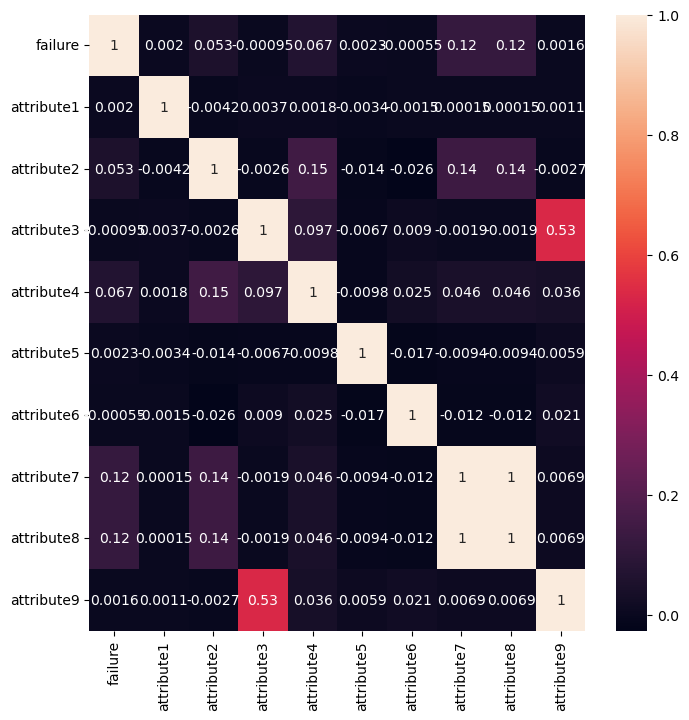

In [14]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True);

In [15]:
df.corr()["failure"].sort_values(ascending=False)

failure       1.000000
attribute7    0.119055
attribute8    0.119055
attribute4    0.067398
attribute2    0.052902
attribute5    0.002270
attribute1    0.001984
attribute9    0.001622
attribute6   -0.000550
attribute3   -0.000948
Name: failure, dtype: float64

In [18]:
df["device"].value_counts()

S1F0FGBQ    304
W1F0SJJ2    304
Z1F0GE1M    304
Z1F0KJDS    304
Z1F0KKN4    304
           ... 
Z1F0LT6P      5
Z1F0LT6Z      5
W1F1CJKT      5
S1F04KSC      4
W1F0WJFT      3
Name: device, Length: 1168, dtype: int64

In [20]:
df["failure"].value_counts()

0    124388
1       106
Name: failure, dtype: int64

In [ ]:
# FEATURE ENGINEERING

In [19]:
#Date i ayıralım
df["date"]=pd.to_datetime(df["date"])

In [20]:
df["day"]=df["date"].dt.day
df["month"]=df["date"].dt.month
df["year"]=df["date"].dt.year

In [22]:
#silinecekleri silelim
del df["attribute8"]
del df["date"]

In [23]:
df.head()

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9,day,month,year
0,S1F01085,0,215630672,56,0,52,6,407438,0,7,1,1,2015
1,S1F0166B,0,61370680,0,3,0,6,403174,0,0,1,1,2015
2,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,1,1,2015
3,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,1,1,2015
4,S1F01R2B,0,135970480,0,0,0,15,313173,0,3,1,1,2015


In [24]:
# cihaz isimlerini kısaltmak için ilk dört önemliyi almak için
df["device"]=[i[:4] for i in df.device.values.tolist()] 

In [25]:
#kontrol
df.device.value_counts()

S1F0    33169
W1F0    23294
S1F1    21689
W1F1    19974
Z1F0    18869
Z1F1     7248
Z1F2      251
Name: device, dtype: int64

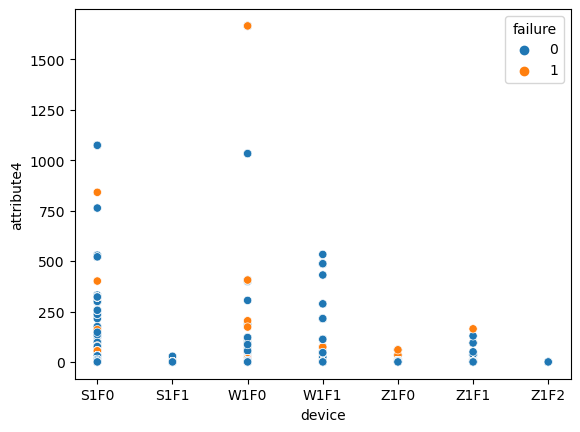

In [28]:
# Veriyi görselleştirelim
sns.scatterplot(x="device",y="attribute4",hue="failure",data=df);

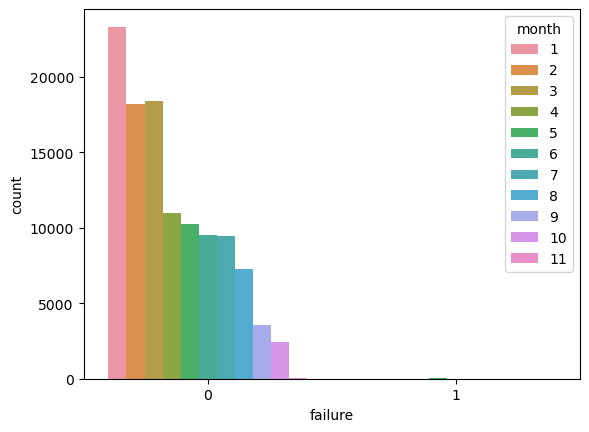

In [34]:
sns.countplot(data=df,x="failure",hue="month");

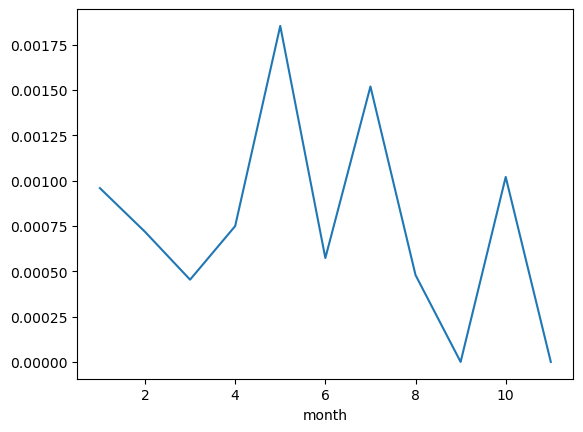

In [31]:
df.groupby("month")["failure"].mean().plot();

In [29]:
df[["attribute3","attribute4","attribute7","attribute9"]]=df[["attribute3","attribute4","attribute7","attribute9"]].astype(int)

In [32]:
#outlierslar bazen istenmezler..
outliers=df.quantile(.97)
df=df[(df['attribute1']<outliers['attribute1'])]
df=df[(df['attribute2']<outliers['attribute2'])]
df=df[(df['attribute6']<outliers['attribute6'])]

In [35]:
# MODELLEME VE ALGORİTMALARI
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split

In [67]:
def classification(x,y):
    
    g=GaussianNB()
    b=BernoulliNB()
    k=KNeighborsClassifier()
    svc=SVC()
    d=DecisionTreeClassifier()
    log=LogisticRegression()
    gbc=GradientBoostingClassifier()
    mn=MultinomialNB()
    rf=RandomForestClassifier()
    ab=AdaBoostClassifier()
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
    
    algos=[g,b,k,svc,d,log,gbc,mn,rf,ab]
    algos_name=['Gaussian','Bernoulli','KNeigbors','SVC','DecisionTree','LogisticRegr','GradientBoosting','Multinominal','RandomForest','AdaBoost']
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
   
    result=pd.DataFrame(columns=['AccuracyScore','PrecisionScore','RecallScore','f1_Score'],index=algos_name)
    
    for i in algos:
        
        rus=RandomUnderSampler(random_state=42)
        
        x_rus,y_rus=rus.fit_resample(x_train,y_train)
        
        predict=i.fit(x_rus,y_rus).predict(x_test)
        
        accuracy.append(accuracy_score(y_test,predict))
        precision.append(precision_score(y_test,predict))
        recall.append(recall_score(y_test,predict))
        f1.append(f1_score(y_test,predict))
    
    result.AccuracyScore=accuracy
    result.PrecisionScore=precision
    result.RecallScore=recall
    result.f1_Score=f1
    
    
    return result.sort_values('AccuracyScore',ascending=False)

In [37]:
x=df.drop("failure", axis=1)
y=df["failure"]

In [38]:
x=pd.get_dummies(x,drop_first=True)

In [ ]:
#burada olduğu gibi inbalance yani dengesiz verilerde iki şey yapıyoruz hata veren veri kadarını seçerek çalışma yada hata verenlerin sayısı artırılabilir 

<img src="samplingler.jpg">

In [49]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import geometric_mean_score, make_index_balanced_accuracy, classification_report_imbalanced
from sklearn.metrics import confusion_matrix

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42) 
gbc=GradientBoostingClassifier()

In [69]:
rus=RandomUnderSampler(random_state=13)

In [70]:
x_rus,y_rus=rus.fit_resample(x_train,y_train)
pred=gbc.fit(x_rus,y_rus).predict(x_test)

In [71]:
confusion_matrix(y_test,pred)

array([[17602,  5087],
       [    5,     5]], dtype=int64)

In [72]:
classification(x,y)

,AccuracyScore,PrecisionScore,RecallScore,f1_Score
Bernoulli,0.914313,0.003082,0.6,0.006132
RandomForest,0.870259,0.002036,0.6,0.004058
GradientBoosting,0.821842,0.001483,0.6,0.002959
Gaussian,0.783118,0.000407,0.2,0.000812
DecisionTree,0.781576,0.001008,0.5,0.002013
AdaBoost,0.768624,0.000952,0.5,0.001900
LogisticRegr,0.537733,0.000477,0.5,0.000952
KNeigbors,0.525530,0.000464,0.5,0.000928
Multinominal,0.441121,0.000552,0.7,0.001102
SVC,0.233490,0.000402,0.7,0.000804


In [2]:
#from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=42)
x_os,y_os=os.fit_resample(x_rus,y_train)

NameError: name 'x_train' is not defined

In [ ]:
#from sklearn.model_selection import train_test_split
#from sklearn.naive_bayes import BernoulliNB

In [ ]:
#X_train, X_test, y_train, y_test=train_test_split(X_os, y_os, test_size=0.2, random_state=42)

In [ ]:
#model = BernoulliNB()
#model.fit(X_train, y_train)

In [ ]:
#y_pred= model.predict(X_test)